In [1]:
"""
A basic example of a pack simulation consisting of two sets of 16 parallel
cells connected in series for a total of 32 cells.
"""

import liionpack as lp
import pybamm
import numpy as np
import os



/home/ruihe_li/Env_liionpack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-07 10:27:52,755	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
lp.set_logging_level("NOTICE")

In [3]:
# Define parameters
Np = 16
Ns = 2
Iapp = 20

# Generate the netlist
netlist = lp.setup_circuit(Np=Np, Ns=Ns)

In [4]:
# Define additional output variables
output_variables = ["Volume-averaged cell temperature [K]"]

# Define a cycling experiment using PyBaMM
experiment = pybamm.Experiment(
    [
        f"Charge at {Iapp} A for 30 minutes",
        "Rest for 15 minutes",
        f"Discharge at {Iapp} A for 30 minutes",
        "Rest for 30 minutes",
    ],
    period="10 seconds",
)

In [5]:
# Define the PyBaMM parameters
parameter_values = pybamm.ParameterValues("Chen2020")
inputs = {"Total heat transfer coefficient [W.m-2.K-1]": np.ones(Np * Ns) * 10}

In [6]:
# Solve the pack
output = lp.solve(
    netlist=netlist,
    sim_func=lp.thermal_simulation,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=0.5,
    inputs=inputs,
    nproc=os.cpu_count(),
    manager="casadi",
)

Stepping simulation: 100%|██████████| 180/180 [00:07<00:00, 24.62it/s]


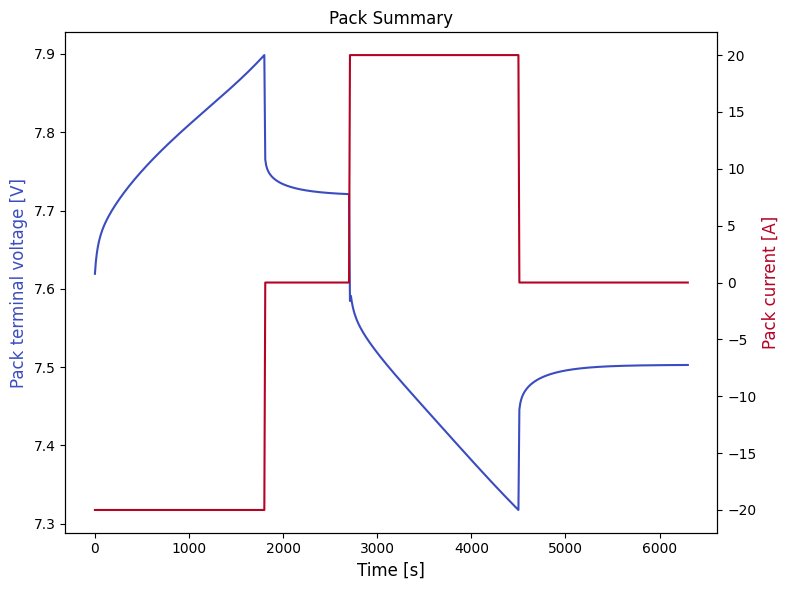

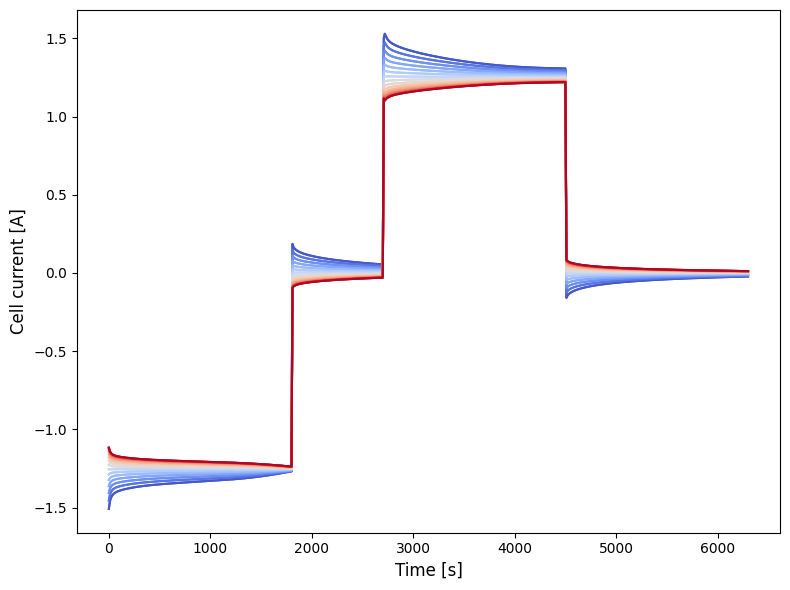

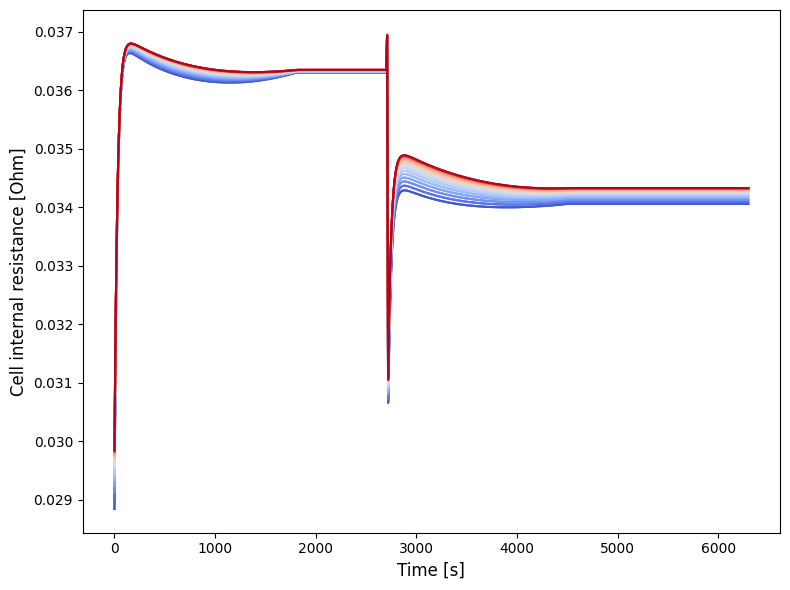

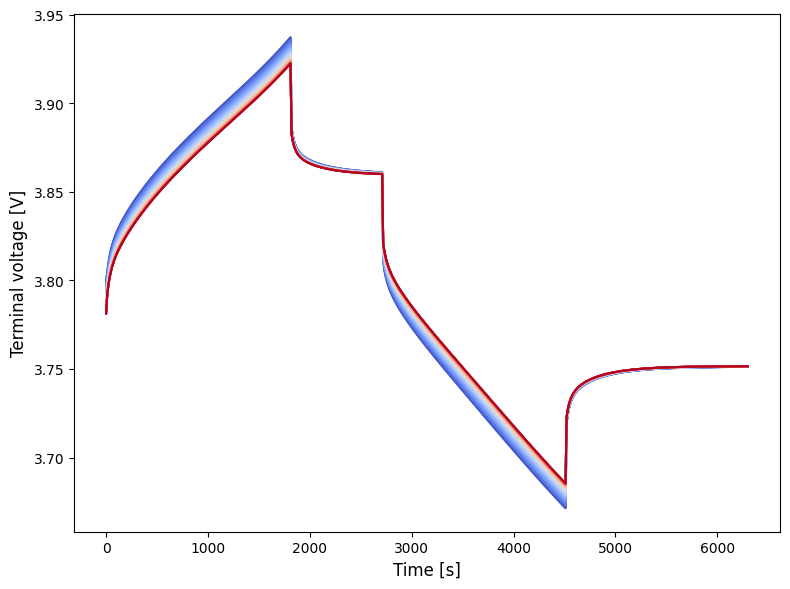

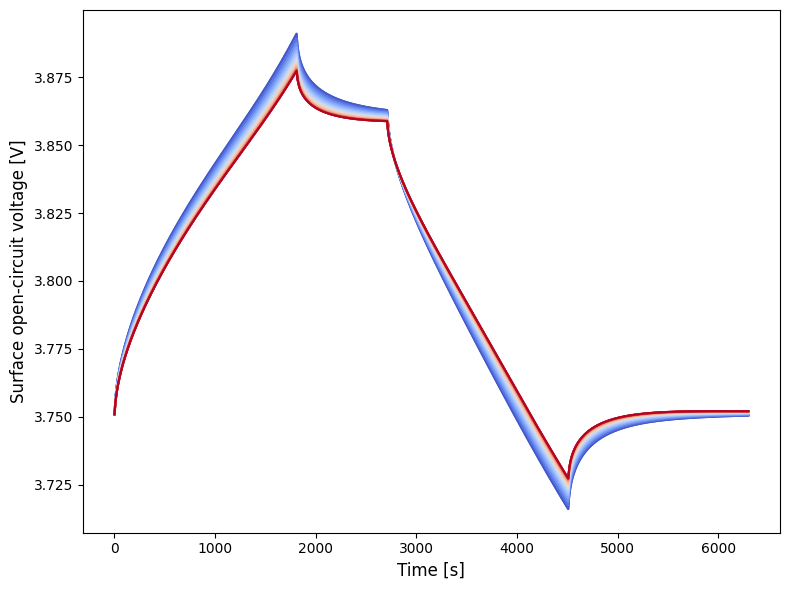

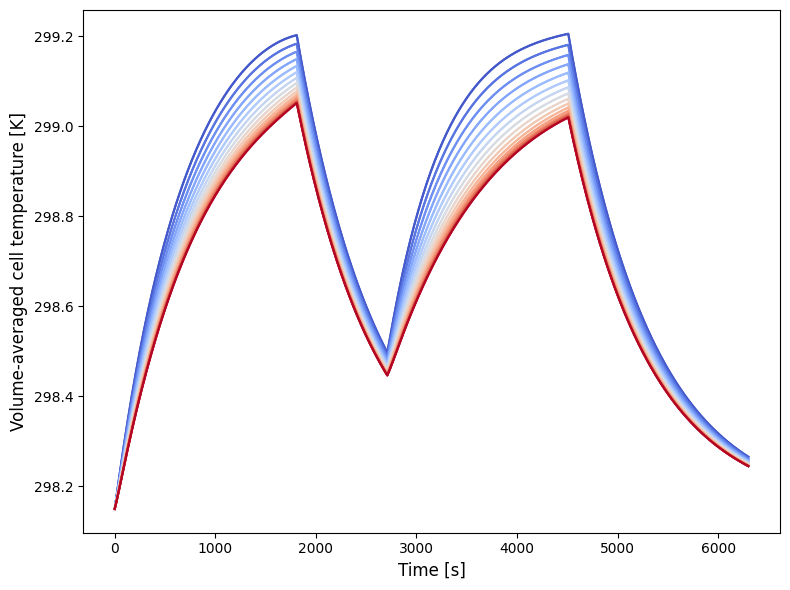

In [9]:
# Plot the pack and individual cell results
lp.plot_pack(output, color="white")
lp.plot_cells(output, color="white")
lp.show_plots()

In [8]:
net = lp.setup_circuit(Np=3, Ns=1, Rb=1e-4, Rc=1e-2, Ri=5e-2, V=3.2, I=80.0)
lp.draw_circuit(net)

RuntimeError: pdflatex is not installed